# Time Series Forecast with Prophet

## Introduction:
This is a simple kernel in which we will forecast stock prices using Prophet (Facebook's library for time series forecasting). However, historical prices are no indication whether a price will go up or down.  I'll rather use my own variables and use machine learning for stock price prediction rather than just using historical prices as an indication of stock price increase.


## A Summary about Prophet:
Facebook's research team has come up with an easier implementation of forecasting through it's new library called Prophet. From what I have read, the blog state's that analyst that can produce high quality forecasting data is rarely seen. This is one of the reasons why Facebook's research team came to an easily approachable way for using advanced concepts for time series forecasting and us Python users, can easily relate to this library since it uses Scikit-Learn's api (Similar to Scikit-Learn). To gain further information, you can look at  [Prophet Blog](https://research.fb.com/prophet-forecasting-at-scale/). Prophet's team main goal is to <b>to make it easier for experts and non-experts to make high quality forecasts that keep up with demand. </b> <br><br>

There are several characteristics of Prophet (you can see it in the blog) that I want to share with you Kaggles that shows where Prophet works best:
<ul>
<li>hourly, daily, or weekly observations with at least a few months (preferably a year) of history </li>
<li>strong multiple “human-scale” seasonalities: day of week and time of year </li>
<li>Important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl) </li>
<li>A reasonable number of missing observations or large outliers </li>
<li>Historical trend changes, for instance due to product launches or logging changes </li>
<li>Trends that are non-linear growth curves, where a trend hits a natural limit or saturates </li>
</ul>
<br><br>

### How does Prophet Work?
---> In the process of UpDate.....


In [2]:
pip install numpy prophet statsmodels scipy plotly


  Using cached holidays-0.57-py3-none-any.whl.metadata (26 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 4.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/13.3 MB 7.5 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 15.7 MB/s eta 0:00:01
   ------------------------------------ --- 12.1/13.3 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 15.8 MB/s eta 0:00:00
Using cached holidays-0.57-py3-none-any.whl (1.1 MB)


In [5]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
# from pandas.core import Datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.subplots as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv(r'C:\Users\Aditya V\Desktop\Data Science\2_EDA and feature engineering\Adidas_stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,183.050003,186.899994,181.350006,184.399994,175.456146,803984
1,2019-01-03,182.699997,186.899994,182.350006,183.949997,175.027954,776471
2,2019-01-04,186.149994,191.300003,185.449997,191.050003,181.783585,930881
3,2019-01-07,189.149994,191.300003,189.000000,189.699997,180.499084,498239
4,2019-01-08,189.699997,197.100006,189.500000,194.300003,184.875992,834170


In [12]:
# Brief Description of our dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1.463000e+03
mean,223.540704,226.319501,220.786808,223.585489,218.235155,6.268977e+05
std,54.022040,54.194393,53.689341,53.885374,50.697879,3.958013e+05
min,95.989998,96.769997,93.400002,93.949997,93.272148,0.000000e+00
25%,176.630005,179.199997,174.189995,176.400002,175.470421,4.066405e+05
50%,224.699997,226.500000,222.300003,224.600006,221.100006,5.309670e+05
75%,273.675003,276.324997,270.299988,273.375000,263.843582,7.185395e+05
max,325.750000,336.250000,324.899994,336.250000,327.720184,4.104049e+06


We need to make sure if the Date column is either a categorical type or a Datetype. In our case Date is a categorical datatype so we need to change it to Datetime.

In [14]:
df.info() # Check whether the Date is as object type or Date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1463 non-null   object 
 1   Open       1463 non-null   float64
 2   High       1463 non-null   float64
 3   Low        1463 non-null   float64
 4   Close      1463 non-null   float64
 5   Adj Close  1463 non-null   float64
 6   Volume     1463 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.1+ KB


In [15]:
#  Change to Dateformat
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,183.050003,186.899994,181.350006,184.399994,175.456146,803984
1,2019-01-03,182.699997,186.899994,182.350006,183.949997,175.027954,776471
2,2019-01-04,186.149994,191.300003,185.449997,191.050003,181.783585,930881
3,2019-01-07,189.149994,191.300003,189.000000,189.699997,180.499084,498239
4,2019-01-08,189.699997,197.100006,189.500000,194.300003,184.875992,834170


In [18]:
# Create a copy to avoid the SettingWarning .loc issue 
df_df = df.copy()
# Change to Datetime datatype.
df_df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [20]:
print(df_df['Date'].dtype)

object


In [21]:
df_df = df_df[pd.to_datetime(df_df['Date'], errors='coerce').notnull()]
df_df['Date'] = pd.to_datetime(df_df['Date'], errors='coerce')

In [22]:
df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1463 non-null   datetime64[ns]
 1   Open       1463 non-null   float64       
 2   High       1463 non-null   float64       
 3   Low        1463 non-null   float64       
 4   Close      1463 non-null   float64       
 5   Adj Close  1463 non-null   float64       
 6   Volume     1463 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.1 KB


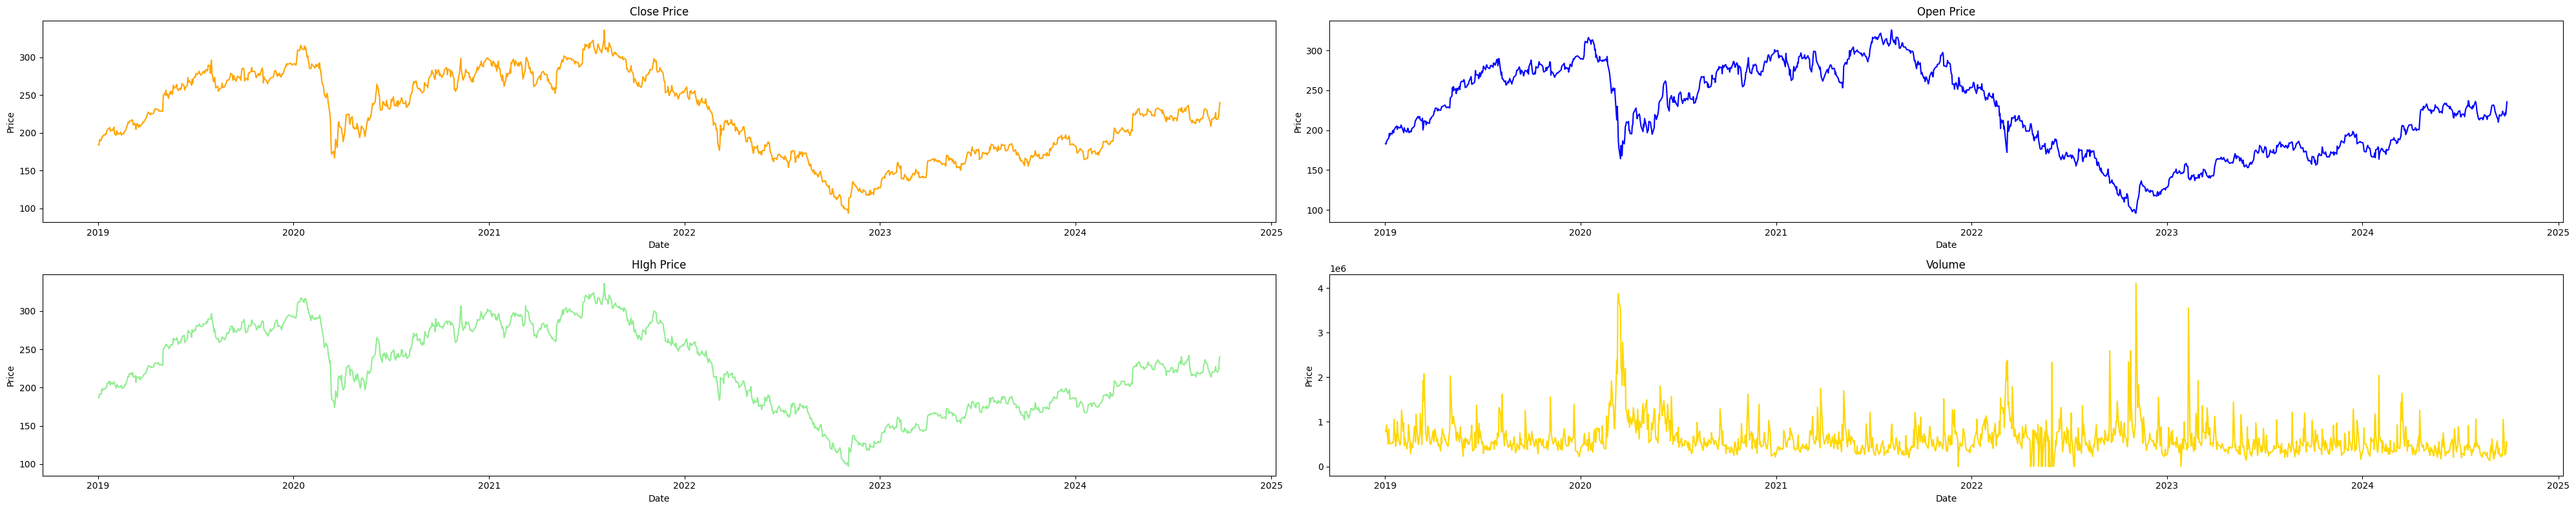

In [29]:
plt.subplots(2,2, figsize = (40,8))

plt.subplot(221)
plt.plot(df_df['Date'], df_df['Close'], color = 'orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price')

plt.subplot(222)
plt.plot(df_df['Date'], df_df['Open'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open Price')

plt.subplot(223)
plt.plot(df_df['Date'], df_df['High'], color = 'lightgreen')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('HIgh Price')

plt.subplot(224)
plt.plot(df_df['Date'], df_df['Volume'], color = 'gold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Volume')

plt.tight_layout()
plt.savefig('Plots_adidas.png')


### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this kernel.

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and Date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [36]:
m = Prophet()

# Drop the columns
ph_df = df_df.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2019-01-02,184.399994
1,2019-01-03,183.949997
2,2019-01-04,191.050003
3,2019-01-07,189.699997
4,2019-01-08,194.300003


In [37]:
ph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1463 non-null   datetime64[ns]
 1   y       1463 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [68]:
ph_df.dropna(subset=['ds', 'y'], inplace=True)

In [39]:
m = Prophet()

m.fit(ph_df)

21:46:49 - cmdstanpy - INFO - Chain [1] start processing
21:46:50 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# Create Future Dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1823,2025-09-23,275.300665,194.654024,370.000538
1824,2025-09-24,275.261840,198.525963,372.463998
1825,2025-09-25,274.987191,192.450089,373.113673
1826,2025-09-26,274.784298,194.745117,374.286174
1827,2025-09-27,268.677426,186.036890,366.655634


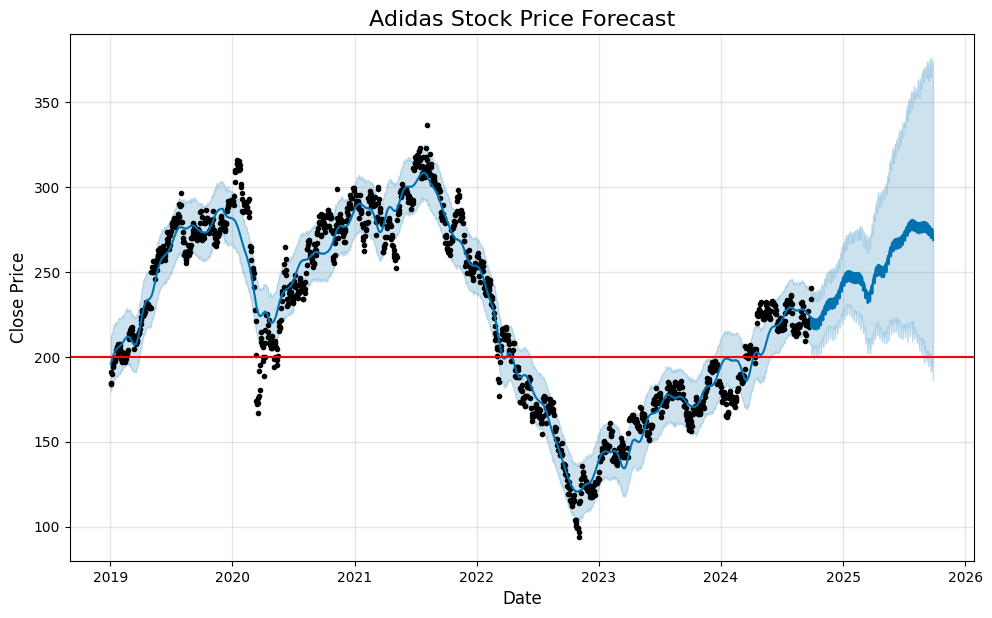

In [71]:
import matplotlib.dates as mDates

# Dates
starting_Date = dt.datetime(2018, 4, 7)
starting_Date1 = mDates.date2num(starting_Date)
trend_Date = dt.datetime(2018, 6, 7)
trend_Date1 = mDates.date2num(trend_Date)


# Learn more Prophet tomorrow and plot the forecast for Adidas.
fig = m.plot(forecast)
ax1 = fig.gca()
ax1.set_title("Adidas Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)


ax1.axhline(y=200, color='red', linestyle='-')

plt.savefig('Adidas_forecast.png')
plt.show()

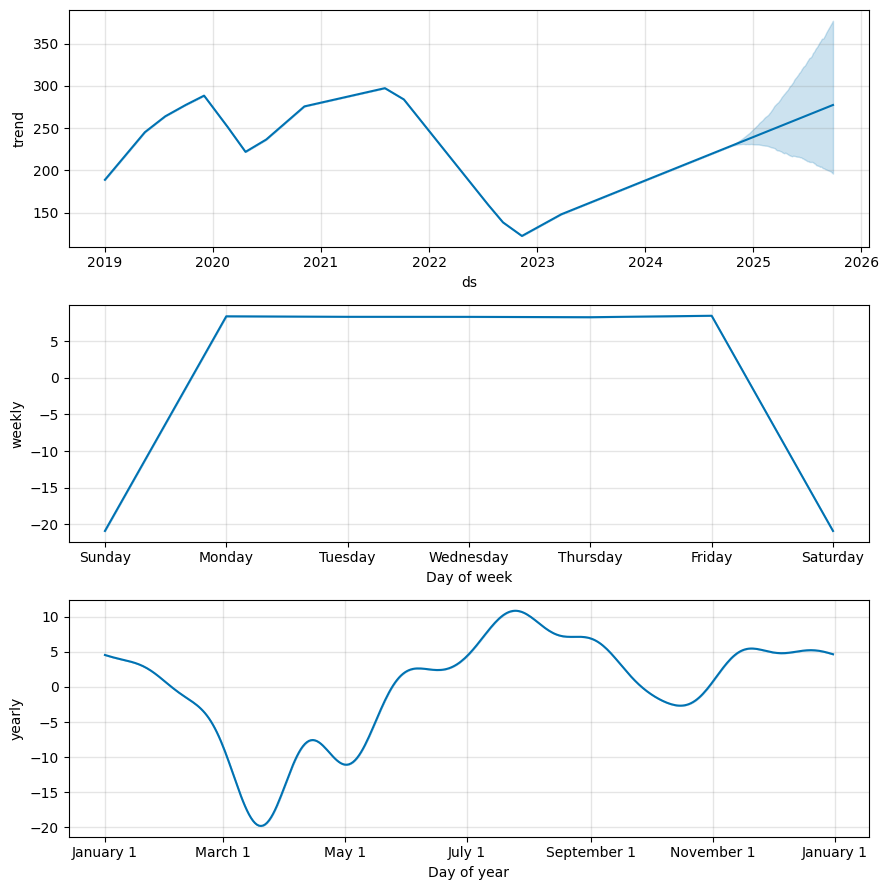

In [69]:
fig2 = m.plot_components(forecast)
plt.savefig('forecast_trend_weekly_yearly.png')
plt.show()

22:04:13 - cmdstanpy - INFO - Chain [1] start processing
22:04:13 - cmdstanpy - INFO - Chain [1] done processing


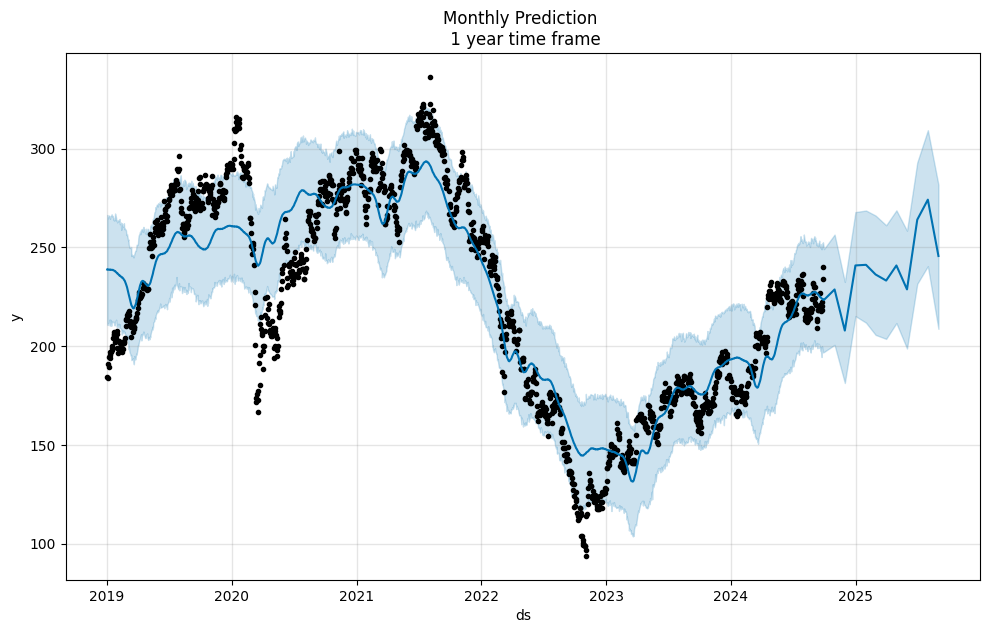

In [70]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.savefig('Monthly_one_year_timeframe.png')
plt.show()

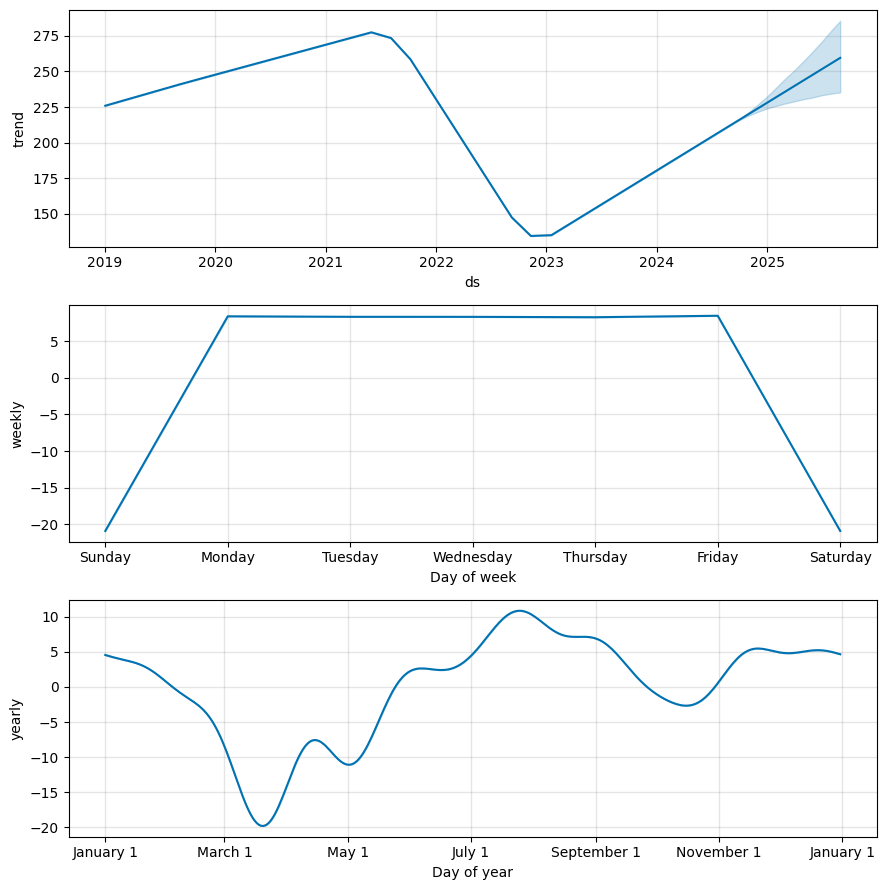

In [44]:
fig = m.plot_components(fcst)
plt.show()